In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv('kaggle_movie_train.csv')
data.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [71]:
data.shape

(22579, 3)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [73]:
data.drop(columns= 'id', inplace= True)
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [74]:
data.isna().any()

text     False
genre    False
dtype: bool

In [28]:
data['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

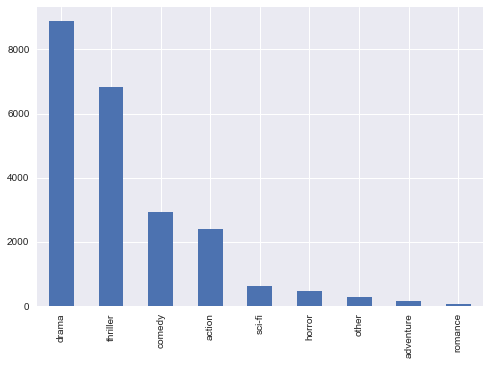

In [29]:
plt.style.use('seaborn')
data['genre'].value_counts().plot(kind = 'bar')
plt.show()

In [30]:
genre_mapping = {'other': 0, 'action': 1, 'romance': 2, 'horror': 3, 'sci-fi': 4, 'comedy': 5,'thriller': 6, 'drama': 7,'adventure': 8}
genre_mapping

{'other': 0,
 'action': 1,
 'romance': 2,
 'horror': 3,
 'sci-fi': 4,
 'comedy': 5,
 'thriller': 6,
 'drama': 7,
 'adventure': 8}

In [31]:
data['genre'] = data['genre'].map(genre_mapping)
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",6
1,"t, summa cum laude and all. And I'm about to l...",5
2,"up Come, I have a surprise.... She takes him ...",7
3,ded by the two detectives. INT. JEFF'S APARTME...,6
4,"nd dismounts, just as the other children reach...",7


In [32]:
data['text'][0]

"eady dead, maybe even wishing he was. INT. 2ND FLOOR HALLWAY THREE NIGHT The Orderly leads Liza to a door. ORDERLY In here. White guy in his 30s. He opens the door and they step into... ROOM THREE There's a white guy in his mid 30s. He looks up. Wild. Straight jacketed. Not Jerry. Liza's reached the end of her rope. She just shakes her head. INT. DECREPIT HOSPITAL ROOM NIGHT Balled up. Fetal. Not really all there. Head pressed to the cement, he tries to sing to himself. JERRY Blue moon... Blue moon... INT. 2ND FLOOR HALLWAY THREE NIGHT Liza just stands there, leaning on a rail on the wall. The Orderly isn't sure what's going on, but he knows it's bad. ORDERLY You okay? Liza starts down the hall with the Orderly following. ORDERLY We got some new patients last week. You want to see them? Liza waves them off. It's hopeless. She stops at a chicken wired window at the end of the hall, looks out. Light's about to break and Jerry's out there somewhere. ORDERLY Look, I gotta get back to work

# Data cleaning

In [33]:
import contractions
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string

In [34]:

def preprocessor(text):
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string=text)
    text = text.lower()
    text = text.split()
    text = [ words for words in text if words not in set(stopwords.words('english'))]
    text = [ps.stem(words)  for words in text]
    text = ' '.join(text)
    return text

In [35]:
preprocessor(data['text'][0])

'eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work'

In [36]:
data['cleantext'] = data['text'].apply(preprocessor)
data.head(10)

,text,genre,cleantext
0,"eady dead, maybe even wishing he was. INT. 2ND...",6,eadi dead mayb even wish int nd floor hallway ...
1,"t, summa cum laude and all. And I'm about to l...",5,summa cum laud launch brand new magazin call e...
2,"up Come, I have a surprise.... She takes him ...",7,come surpris take hand lead hallway salvator l...
3,ded by the two detectives. INT. JEFF'S APARTME...,6,ded two detect int jeff apart night medium sho...
4,"nd dismounts, just as the other children reach...",7,nd dismount children reach throw arm embrac ch...
5,breadth of the bluff. Gabe pulls out his ancie...,6,breadth bluff gabe pull ancient binocular scan...
6,uilding. A MAN in pajamas runs out into the ra...,6,uild man pajama run rain cabbi lose grip bumpe...
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,7,ell rita hayworth disgustingli rich well make ...
8,"Memphis goes back into the garage, Budgy cack...",6,memphi goe back garag budgi cackl cut ext ranc...
9,e reels as the world spins. Sweat pours off hi...,1,e reel world spin sweat pour pressur build ins...


In [37]:
data.to_csv('clean_genre.csv', index=False)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(data.cleantext).toarray()

In [49]:
X.shape

(22579, 10000)

In [50]:
y = data['genre'].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [52]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [53]:
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Accuracy score is: {}%".format(round(score_*100,2)))

Accuracy score is: 89.57%


In [55]:
# model performance
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[  62    1    0    2    0    0    0    1    0]
 [   0  450    0    1    0    8   11    6    0]
 [   0    1   10    0    0    0    0    0    0]
 [   0    1    0   73    0    1    3    4    0]
 [   0    2    0    1  112    2    8    7    0]
 [   0    7    0    2    4  517   11   18    0]
 [   0   14    0   11   22   21 1173   77    0]
 [   3   42    1   21   11   38  103 1607    1]
 [   0    2    0    0    0    0    1    1   41]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.87      0.95      0.90       476
           2       0.91      0.91      0.91        11
           3       0.66      0.89      0.76        82
           4       0.75      0.85      0.80       132
           5       0.88      0.92      0.90       559
           6       0.90      0.89      0.89      1318
           7       0.93      0.88      0.91      1827
           8       0.98      0.91      0.94        45

    accuracy             

In [56]:
import pickle

In [57]:
pickle.dump(cv,open('vectorizer_genre.pkl','wb'))
pickle.dump(nb_classifier,open('model_genre.pkl','wb'))

In [64]:
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

In [67]:
def get_genre(text):
    text=preprocessor(text)
    vec=[]
    vec.append(text)
    vector=cv.transform(vec)
    res=nb_classifier.predict(vector)[0]
    return get_key_by_value(genre_mapping,res)

In [68]:
get_genre(data['text'][18])

'thriller'

In [63]:
data.head(20)

,text,genre,cleantext
0,"eady dead, maybe even wishing he was. INT. 2ND...",6,eadi dead mayb even wish int nd floor hallway ...
1,"t, summa cum laude and all. And I'm about to l...",5,summa cum laud launch brand new magazin call e...
2,"up Come, I have a surprise.... She takes him ...",7,come surpris take hand lead hallway salvator l...
3,ded by the two detectives. INT. JEFF'S APARTME...,6,ded two detect int jeff apart night medium sho...
4,"nd dismounts, just as the other children reach...",7,nd dismount children reach throw arm embrac ch...
5,breadth of the bluff. Gabe pulls out his ancie...,6,breadth bluff gabe pull ancient binocular scan...
6,uilding. A MAN in pajamas runs out into the ra...,6,uild man pajama run rain cabbi lose grip bumpe...
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,7,ell rita hayworth disgustingli rich well make ...
8,"Memphis goes back into the garage, Budgy cack...",6,memphi goe back garag budgi cackl cut ext ranc...
9,e reels as the world spins. Sweat pours off hi...,1,e reel world spin sweat pour pressur build ins...


# Movie API to detect genre

In [75]:
from tmdbv3api import TMDb
from tmdbv3api import Movie

# Replace 'YOUR_API_KEY' with your actual TMDb API key
tmdb = TMDb()
tmdb.api_key = 'f03abce17e11e695cce8ce75b3d4348d'
movie = Movie()

In [86]:
def get_movie_genre(title):
    title = title.split('(')[0].strip()
    results = movie.search(title)
    try:
        return get_genre(results[0].overview)
    except:
        return 'other'
    

In [91]:
get_movie_genre('The Dark Knight')

'thriller'